In [91]:
import numpy as np
import pandas as pd
import urllib
# url ="https://goo.gl/uWbihf"
# data = pd.read_csv(url,sep=";")
# loc= "C:\\Data\\Monthly Sunspots.csv"
# data.to_csv(loc,index = False)
# data_csv = pd.read_csv(loc,header=None)

In [92]:
# data_csv = pd.read_excel('./Suez Cement(01-01-2013 till 01-01-2018).xls')
# data_csv = pd.read_excel('./Medinet Nasr Housing(01-01-2013 till 01-01-2018).xls')
data_csv= pd.read_excel('./Telecom Egypt(01-01-2013 till 01-01-2018).xls')

In [93]:
data_csv.head()

,SYMBOL_CODE,TRADE_DATE,TRADE_VOLUME,TRADE_VALUE,TRADE_COUNT,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE
0,EGS48031C016,2013-01-02,742192,10760813.36,346,14.20,14.58,14.20,14.50
1,EGS48031C016,2013-01-03,659245,9540410.34,400,14.36,14.54,14.30,14.47
2,EGS48031C016,2013-01-06,657748,9532597.93,348,14.35,14.52,14.35,14.49
3,EGS48031C016,2013-01-08,762240,11182074.69,538,14.48,14.93,14.32,14.67
4,EGS48031C016,2013-01-09,838660,12528344.92,592,14.89,15.11,14.77,14.94


In [94]:
yt= data_csv['CLOSE_PRICE']

In [95]:
import matplotlib.pyplot as plt

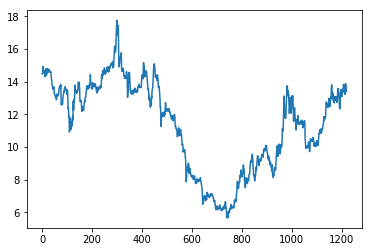

In [96]:
plt.plot(yt)

In [97]:
yt_1=yt.shift(1)
yt_2=yt.shift(2)
yt_3=yt.shift(3)
yt_4=yt.shift(4)
yt_5=yt.shift(5)

In [98]:
data=pd.concat([yt,yt_1, yt_2,yt_3,yt_4,yt_5], axis=1)
data.columns = ['yt','yt_1', 'yt_2','yt_3','yt_4','yt_5']

In [99]:
yt.head()

0    14.50
1    14.47
2    14.49
3    14.67
4    14.94
Name: CLOSE_PRICE, dtype: float64

In [100]:
yt_2.head()

0      NaN
1      NaN
2    14.50
3    14.47
4    14.49
Name: CLOSE_PRICE, dtype: float64

In [101]:
data.tail()

,yt,yt_1,yt_2,yt_3,yt_4,yt_5
1215,13.89,13.32,13.23,13.47,13.36,13.43
1216,13.81,13.89,13.32,13.23,13.47,13.36
1217,13.44,13.81,13.89,13.32,13.23,13.47
1218,13.53,13.44,13.81,13.89,13.32,13.23
1219,13.42,13.53,13.44,13.81,13.89,13.32


In [102]:
data = data.dropna()

In [103]:
y = data['yt']
x = data[['yt_1', 'yt_2','yt_3','yt_4','yt_5']]

In [104]:
len(x),len(y)

(1215, 1215)

In [105]:
from sklearn import preprocessing
scaler_x = preprocessing.MinMaxScaler(feature_range=(-1, 1))
x = np.array(x).reshape((len(x), 5))
x = scaler_x.fit_transform(x)
scaler_y = preprocessing.MinMaxScaler(feature_range=(-1, 1))
y = np.array(y).reshape((len(y), 1))
y = scaler_y.fit_transform(y)

In [106]:
train_end = 1140
x_train = x[0:train_end ]
x_test = x[train_end + 1:len(x) ]
y_train = y[0:train_end]
y_test = y[train_end + 1:len(x)]
x_train = x_train.reshape(x_train.shape + (1, ))
x_test = x_test.reshape(x_test.shape + (1, ))

In [107]:
x.shape, y.shape, x_train.shape, y_train.shape, x_test.shape, y_test.shape,len(x)

((1215, 5), (1215, 1), (1140, 5, 1), (1140, 1), (74, 5, 1), (74, 1), 1215)

In [108]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation,Dropout
from keras.layers.recurrent import LSTM

In [109]:
seed = 2016
np.random.seed (seed)
model = Sequential()


In [110]:
model.add(LSTM(units=4,
         activation='relu',
         recurrent_activation='hard_sigmoid',
         input_shape=(5,1)))

model.add(Dropout(0.05))

model.add(Dense(units=1,activation='linear'))

In [111]:
model.compile(loss='mean_squared_error',
             optimizer='adam')

In [132]:
model.fit(x_train,y_train,batch_size=1,epochs=20,shuffle=True)

Epoch 1/20
1140/1140 [==============================] - 5s 5ms/step - loss: 0.0194
Epoch 2/20
1140/1140 [==============================] - 6s 5ms/step - loss: 0.0201
Epoch 3/20
1140/1140 [==============================] - 6s 5ms/step - loss: 0.0158
Epoch 4/20
1140/1140 [==============================] - 5s 4ms/step - loss: 0.0173
Epoch 5/20
1140/1140 [==============================] - 6s 5ms/step - loss: 0.0206
Epoch 6/20
1140/1140 [==============================] - 4s 4ms/step - loss: 0.0220
Epoch 7/20
1140/1140 [==============================] - 5s 4ms/step - loss: 0.0176
Epoch 8/20
1140/1140 [==============================] - 5s 5ms/step - loss: 0.0185
Epoch 9/20
1140/1140 [==============================] - 5s 4ms/step - loss: 0.0202
Epoch 10/20
1140/1140 [==============================] - 5s 5ms/step - loss: 0.0217
Epoch 11/20
1140/1140 [==============================] - 7s 6ms/step - loss: 0.0169
Epoch 12/20
1140/1140 [==============================] - 7s 6ms/step - loss: 0.0150
E

In [133]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
score_train = model.evaluate(x_train, y_train, batch_size=1)
score_test = model.evaluate(x_test, y_test, batch_size=1)


In [134]:
"in train MSE = ", round(score_train,4)

('in train MSE = ', 0.0070000000000000001)

In [135]:
 "in test MSE = ", round(score_test ,4)

('in test MSE = ', 0.0035000000000000001)

In [136]:
pred1 = model.predict(x_test)
pred1 = scaler_y.inverse_transform(np.array(pred1).reshape((len(pred1), 1)))

In [137]:
y_test_original =  scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))

In [138]:
from sklearn.metrics import mean_squared_error

score_rmse  = mean_squared_error(y_true=y_test,y_pred=pred1)

In [141]:
np.square(np.subtract(y_test_original,pred1)).mean()

0.12002265212318573

In [ ]:
y_original = scaler_y.inverse_transform(np.array(y).reshape((len(y), 1)))

In [139]:
x_axis = [i for i in range(len(y))]
x_dates = data_csv['TRADE_DATE']

In [ ]:
type(x_dates)

In [ ]:
df  = pd.read_excel('./Telecom Egypt(01-01-2013 till 01-01-2018).xls')

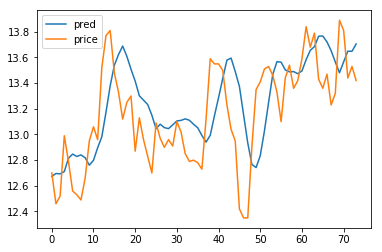

In [140]:

plt.plot(pred1,label='pred')
plt.plot(y_test_original,label='price')
plt.legend()

In [126]:
# plt.plot(x_axis[len(y)-len(pred1):],pred1)
# plt.plot(x_axis[:-200],y_original[:-200])

In [127]:
# seed = 2016
# np.random.seed(seed)
# fit2 = Sequential()
# fit2.add(
#     LSTM(
#         units=4,
#         stateful=True,
#         batch_input_shape=(1, 5, 1),
#         activation='relu',
#         recurrent_activation='relu'))
# fit2.add(Dense(units=1, activation='linear'))
# fit2.compile(loss="mean_squared_error", optimizer="adam")

In [128]:
# end_point =len(x_train)
# start_point =end_point -500

In [129]:
# for i in range(len(x_train[start_point:end_point])):
#     print ("Fitting example ",i)
#     fit2.fit(
#         x_train[start_point:end_point],
#         y_train[start_point:end_point],
#         epochs=1,
#         batch_size=1,
#         verbose=2,
#         shuffle=True)
    
#     fit2.reset_states()

In [130]:
# pred2 = fit2.predict(x_test, batch_size=1)
# pred2 = scaler_y.inverse_transform(np.array(pred2).reshape((len(pred2), 1)))

In [131]:
# plt.plot(pred2,label='pred')
# plt.plot(y_test_original,label='price')
# plt.legend()